<a href="https://colab.research.google.com/github/muntakim1/data-science/blob/main/Covid_19_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


In [ ]:
!pip uninstall tensorflow-gpu tensorflow -y
!pip install livelossplot
!pip install tensorflow-gpu==2.4.0

Found existing installation: tensorflow 2.8.0
Uninstalling tensorflow-2.8.0:
  Successfully uninstalled tensorflow-2.8.0
     |████████████████████████████████| 793 kB 13.3 MB/s 
     |████████████████████████████████| 381 kB 63.1 MB/s 
  Attempting uninstall: prompt-toolkit
    Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Attempting uninstall: ipython
    Found existing installation: ipython 5.5.0
    Uninstalling ipython-5.5.0:
      Successfully uninstalled ipython-5.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-console 5.2.0 requires prompt-toolkit<2.0.0,>=1.0.0, but you have prompt-toolkit 3.0.29 which is incompatible.
google-colab 1.0.0 requires ipython~=5.5.0, but you have ipython 7.33.0 which is incompatible.


     |████████████████████████████████| 394.7 MB 19 kB/s 
     |████████████████████████████████| 3.8 MB 52.3 MB/s 
     |████████████████████████████████| 132 kB 73.3 MB/s 
     |████████████████████████████████| 462 kB 50.5 MB/s 
     |████████████████████████████████| 14.8 MB 53.9 MB/s 
     |████████████████████████████████| 2.9 MB 57.7 MB/s 
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=68718 sha256=892f8c8becad6eed51c4254793512131080a7efb079055122457743727e7eae7
  Stored in directory: /root/.cache/pip/wheels/62/76/4c/aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built wrapt
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.2.0
    Uninstalling typing-extensions-4.2.0:
      Successfully uninstalled typing-extensions-4.2.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting

In [ ]:
%tensorflow_version 2.x
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from livelossplot import PlotLossesKerasTF
import numpy as np

In [ ]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)

    except RuntimeError as e:
        print(e)

Data Preprocessing


# Data Cleaning

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Cleaning folders

In [ ]:
!mkdir /content/COVID-19_Radiography_Dataset/Train
!mkdir /content/COVID-19_Radiography_Dataset/Test
!mkdir /content/COVID-19_Radiography_Dataset/Validation
!mv /content/COVID-19_Radiography_Dataset/COVID/ /content/COVID-19_Radiography_Dataset/Train
!mv /content/COVID-19_Radiography_Dataset/Normal/ /content/COVID-19_Radiography_Dataset/Train

mkdir: cannot create directory ‘/content/COVID-19_Radiography_Dataset/Train’: No such file or directory
mkdir: cannot create directory ‘/content/COVID-19_Radiography_Dataset/Test’: No such file or directory
mkdir: cannot create directory ‘/content/COVID-19_Radiography_Dataset/Validation’: No such file or directory
mv: cannot stat '/content/COVID-19_Radiography_Dataset/COVID/': No such file or directory
mv: cannot stat '/content/COVID-19_Radiography_Dataset/Normal/': No such file or directory


In [ ]:
!mkdir /content/COVID-19_Radiography_Dataset/Test/Normal
!mkdir /content/COVID-19_Radiography_Dataset/Test/COVID
!mkdir /content/COVID-19_Radiography_Dataset/Validation/Normal
!mkdir /content/COVID-19_Radiography_Dataset/Validation/COVID

mkdir: cannot create directory ‘/content/COVID-19_Radiography_Dataset/Test/Normal’: No such file or directory
mkdir: cannot create directory ‘/content/COVID-19_Radiography_Dataset/Test/COVID’: No such file or directory
mkdir: cannot create directory ‘/content/COVID-19_Radiography_Dataset/Validation/Normal’: No such file or directory
mkdir: cannot create directory ‘/content/COVID-19_Radiography_Dataset/Validation/COVID’: No such file or directory


In [ ]:
import shutil
import os
'''
Moving 100 and 50 data Train to Test and validation folder
'''

source_dir = '/content/COVID-19_Radiography_Dataset/Train/COVID'
target_dir = '/content/COVID-19_Radiography_Dataset/Validation/COVID'

def MoveFiles(source_dir,target_dir,portion):
  file_names = os.listdir(source_dir)
  percent = lambda part:float(len(file_names)) / 100 * float(part)
  for file_name in file_names[:int(percent(portion))]:
      shutil.move(os.path.join(source_dir, file_name), target_dir)

MoveFiles('/content/COVID-19_Radiography_Dataset/Train/COVID','/content/COVID-19_Radiography_Dataset/Validation/COVID',20)
MoveFiles('/content/COVID-19_Radiography_Dataset/Train/Normal','/content/COVID-19_Radiography_Dataset/Validation/Normal',20)
MoveFiles('/content/COVID-19_Radiography_Dataset/Train/COVID','/content/COVID-19_Radiography_Dataset/Test/COVID',10)
MoveFiles('/content/COVID-19_Radiography_Dataset/Train/Normal','/content/COVID-19_Radiography_Dataset/Test/Normal',10)

In [ ]:
!rm -r /content/COVID-19_Radiography_Dataset/Train/.ipynb_checkpoints/
!rm -r /content/COVID-19_Radiography_Dataset/Validation/.ipynb_checkpoints/


rm: cannot remove '/content/COVID-19_Radiography_Dataset/Train/.ipynb_checkpoints/': No such file or directory
rm: cannot remove '/content/COVID-19_Radiography_Dataset/Validation/.ipynb_checkpoints/': No such file or directory


# Image Data generator

In [ ]:
BATCH_SIZE=32

In [ ]:
train_datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale= 1./255,horizontal_flip=True,zoom_range=0.2,shear_range=0.2)
train_data=train_datagen.flow_from_directory(directory="/content/drive/MyDrive/COVID-19_Radiography_Dataset/Train",shuffle=True,target_size=(229,229),color_mode='grayscale',batch_size=BATCH_SIZE,class_mode='binary')

Found 5184 images belonging to 2 classes.


In [ ]:
test_datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_data=test_datagen.flow_from_directory(directory="/content/drive/MyDrive/COVID-19_Radiography_Dataset/Test",shuffle=False,target_size=(229,229),color_mode='grayscale',batch_size=BATCH_SIZE,class_mode='binary')

Found 576 images belonging to 2 classes.


In [ ]:
val_datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
val_data=val_datagen.flow_from_directory(directory="/content/drive/MyDrive/COVID-19_Radiography_Dataset/Validation",shuffle=False,target_size=(229,229),color_mode='grayscale',batch_size=BATCH_SIZE,class_mode='binary')

Found 1440 images belonging to 2 classes.


# Model

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3),activation='relu',padding = 'Same',input_shape=(229, 229, 1)))
model.add(tf.keras.layers.BatchNormalization())
##############################
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.AveragePooling2D(pool_size = (2, 2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.AveragePooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))
##############################
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.AveragePooling2D(pool_size = (2, 2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.AveragePooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.AveragePooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.AveragePooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))
##############################
model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Activation('relu'))

#Output
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
#Compile the model
opt = tf.keras.optimizers.Adam(lr=0.005, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.01, amsgrad=False)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['acc'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 229, 229, 64)      640       
_________________________________________________________________
batch_normalization (BatchNo (None, 229, 229, 64)      256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 229, 229, 64)      36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 229, 229, 64)      256       
_________________________________________________________________
average_pooling2d (AveragePo (None, 114, 114, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 114, 114, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 114, 114, 64)      3

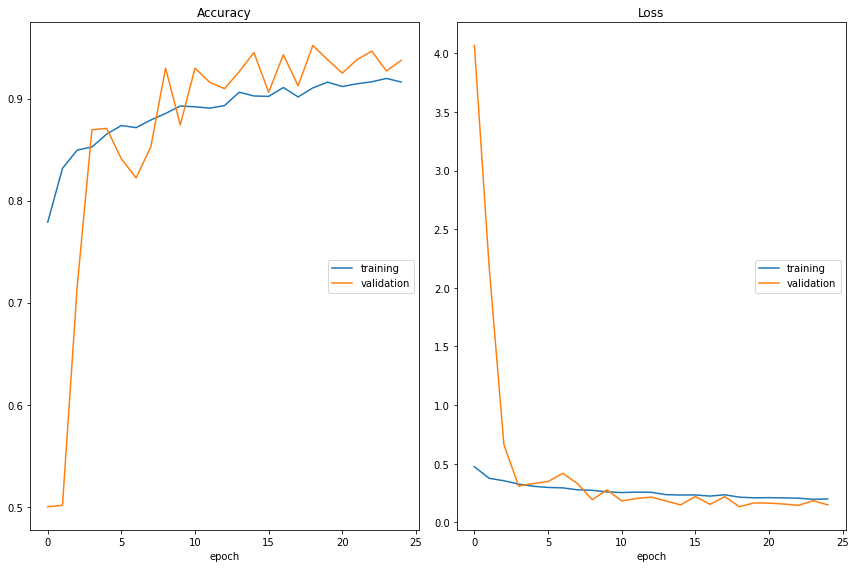

Accuracy
	training         	 (min:    0.779, max:    0.920, cur:    0.916)
	validation       	 (min:    0.500, max:    0.952, cur:    0.938)
Loss
	training         	 (min:    0.197, max:    0.475, cur:    0.200)
	validation       	 (min:    0.133, max:    4.067, cur:    0.149)


In [ ]:
model.fit(train_data,epochs=25,
          callbacks=[PlotLossesKerasTF()],batch_size=BATCH_SIZE,
          validation_data=val_data)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
test_steps_per_epoch = np.math.ceil(test_data.samples / test_data.batch_size)


predictions = model.predict_generator(test_data, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_data.classes

class_labels = list(test_data.class_indices.keys())
print(class_labels)
predictions_flat = predicted_classes.flatten()
true_classes_flat = true_classes.flatten()
print(predictions_flat)
# print(confusion_matrix(true_classes_flat,predictions_flat))

report = classification_report(true_classes_flat, predictions_flat, target_names=class_labels)
print(report)